# Extract a small rectangle from the original data for quick testing

This notebook clips the original data to a small rectangle in order to test
on only small portion of geometries for debugging purposes.

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon

In [2]:
# Load the data
buildings = gpd.read_file("data/gdf_buildings")
parcels = gpd.read_file("data/gdf_parcels")
streets = gpd.read_file("data/gdf_streets")

ERROR 1: PROJ: proj_create_from_database: Open of /home/marek/miniforge3/envs/street/share/proj failed


# Clipping

In [3]:
clip = gpd.read_file("data/extension_area_clip")

In [4]:
# Clip the data

# buildings_clipped = gpd.clip(buildings, clip)
streets_clipped = gpd.clip(streets, clip)
# parcels_clipped = gpd.clip(parcels, clip)

# Selecting

In [5]:
streets_select = streets.cx[1023750:1027000, 6281500:6284250]
parcels_select = parcels.cx[1023750:1027000, 6281500:6284250]

''' 
For the buildings I use a small buffer to ensure right
calculations of sightlines
'''

buildings_select = buildings.cx[1023500:1027250, 6281250:6284500]

# Debugging

<Axes: >

<Axes: >

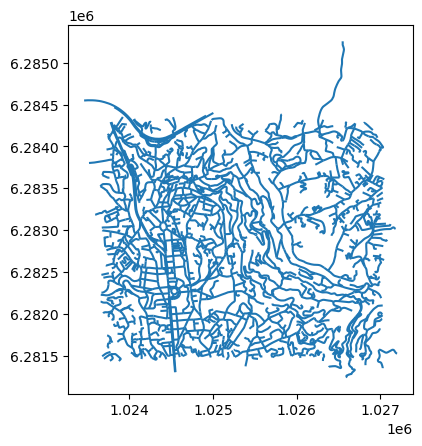

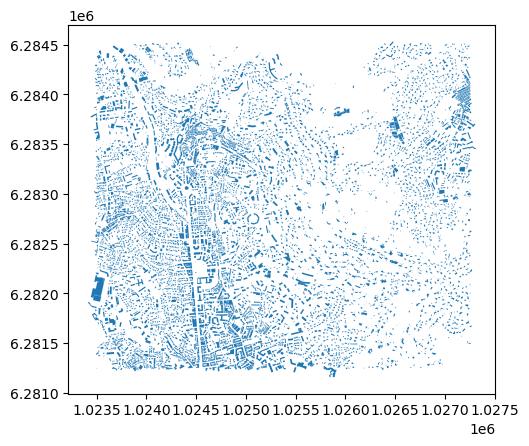

In [6]:
# streets_clipped.plot()
display(streets_select.plot())
display(buildings_select.plot())

# Select only one road for debugging purposes

In [7]:
street = streets_clipped[streets_clipped['uid'] == 74338984]

<Axes: >

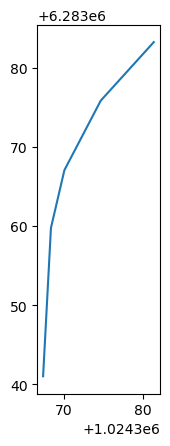

In [8]:
street.plot()

In [9]:
street.to_file("data/street")

# Fixing invalid geometries

In [10]:
# Buildings have invalid geometries, so we can't clip them

buildings_select['geometry'].is_valid.value_counts()

True     12069
False       23
Name: count, dtype: int64

In [11]:
# Let's fix the invalid geometries

buildings_select['geometry'] = buildings['geometry'].buffer(0)

/home/marek/miniforge3/envs/street/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [12]:
# Check if the geometries are valid now

buildings_select['geometry'].is_valid.value_counts()

True    12092
Name: count, dtype: int64

# Extension area polygon

In [13]:
coords = [(1023500, 6281250), (1023500, 6284500), (1027250, 6284500), (1027250, 6281250), (1023500, 6281250)]

poly = Polygon(coords)

extension_area_select = gpd.GeoDataFrame(geometry=[poly], crs=buildings.crs)

<Axes: >

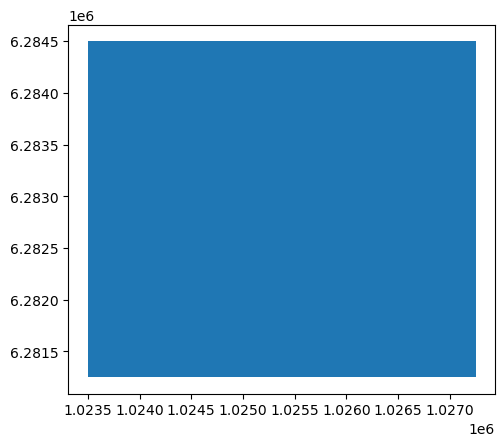

In [14]:
extension_area_select.plot()

# Saving output

In [15]:
''' Save the output data '''

# buildings_clipped.to_file("data/gdf_buildings_clipped")
# streets_clipped.to_file("data/gdf_streets_clipped")
# parcels_clipped.to_file("data/gdf_parcels_clipped")

buildings_select.to_file("data/select/gdf_buildings_select.gpkg")
streets_select.to_file("data/select/gdf_streets_select.gpkg")
parcels_select.to_file("data/select/gdf_parcels_select.gpkg")

In [16]:
extension_area_select.to_file("data/select/extension_area_select.gpkg")